<h1 align="center"> Practical Class 1 - Signal Representation </h1>

<p align="justify">
This practical class reviews some of the possible representations of a signal both in the time domain and in the frequency domain. All of the practical classes will take advantage of the Python programming language to study and model signal converters. The Jupyter Notebooks are a great way to segment the developed code, enabling an easier debugging and learning experience. The Jupyter Notebooks also enable the introduction of Markdown latex HTML notes in the middle of the code cells, offering a truly complete note-taking environment.
</p>

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import scienceplots as splt

%matplotlib inline

<h2 align="center"> 1. Signal Representation in the Time-Domain </h2>

<p align="justify"> This section covers some nuances of the represenation of a signal (voltage/current/code) in the time-domain, throughout an independent axis representing time. Two main aspects of the representation of a signal are presented:
<ul>
<li>1- A signal can be decomposed on an infinite sum of fundamental trigonometric functions (sine and cosine), according to Fourier's Signal Theory;</li>
<li>2- The importance of using a differential signal chain is analysed to observe its impact on the overall distortion of the output signal.</li>
</ul>
</p>

In [66]:
# define the number of points for the simulation
# NOTE: This enables a better control of the simulation time and memmory resources 
Np = 1001
# define time base
Fs = 100e3
Ts = 1/Fs
tD = np.arange(0,Np)*Ts; # (0:Np-1) == np.arange(0,Np)
tD


array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02])

In [67]:
# define the signals
Amp1 = 1
f1 = 1e3
phase1 = 0
phase1_rad = np.deg2rad(phase1)
x1 = Amp1*np.sin(2*np.pi*f1*tD + phase1_rad)
x1

array([ 0.00000000e+00,  6.27905195e-02,  1.25333234e-01, ...,
       -1.25333234e-01, -6.27905195e-02, -2.44929360e-15])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


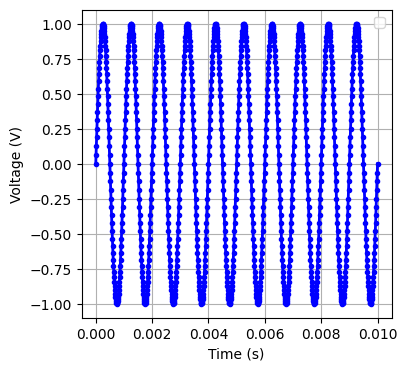

In [68]:
# visualize the signals
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(tD, x1, lw = 2, ls="-", color="b", marker="o", ms=3)
ax.grid(True)
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Time (s)")
ax.legend()
plt.show()

In [69]:
# changing the frequency of the signal
# define the new signal
Amp2 = 1
f2 = 0.5e3
phase2 = 0
phase2_rad = np.deg2rad(phase1)
x2 = Amp2*np.sin(2*np.pi*f2*tD + phase1_rad)
x2

array([ 0.00000000e+00,  3.14107591e-02,  6.27905195e-02, ...,
       -6.27905195e-02, -3.14107591e-02, -1.22464680e-15])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


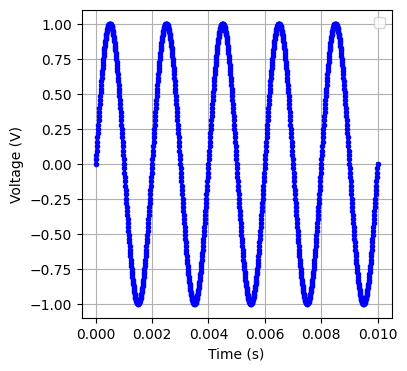

In [70]:
# visualize the signals
fig, ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(tD, x2, lw = 2, ls="-", color="b", marker="o", ms=3)
ax.grid(True)
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Time (s)")
ax.legend()
plt.show()

In [71]:
# observing 2 sinusoids in the same plot
# second harmonic 
Amp2 = 0.5
f2 = 2e3
phase2_rad = np.deg2rad(0)
x2 = Amp2*np.sin(2*np.pi*f2*tD + phase2_rad)
# third harmonic
Amp3 = 0.2
f3 = 3e3
phase3_rad = np.deg2rad(0)
x3 = Amp3*np.sin(2*np.pi*f3*tD + phase3_rad)
x3, x2

(array([ 0.00000000e+00,  3.74762629e-02,  7.36249105e-02, ...,
        -7.36249105e-02, -3.74762629e-02,  1.37259478e-15]),
 array([ 0.00000000e+00,  6.26666168e-02,  1.24344944e-01, ...,
        -1.24344944e-01, -6.26666168e-02, -2.44929360e-15]))

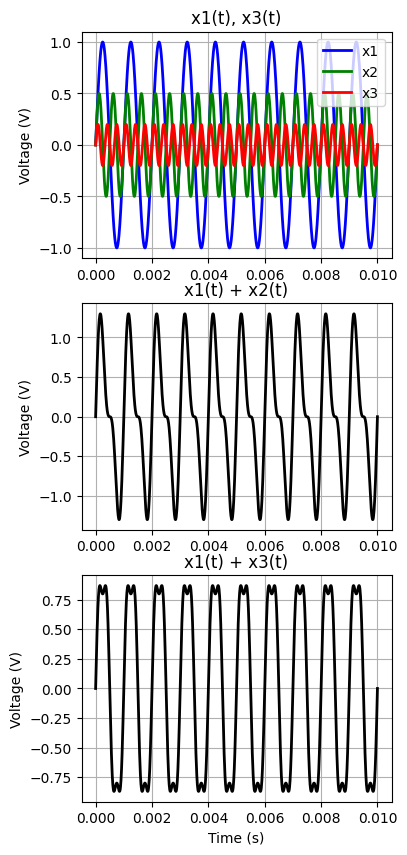

In [72]:
# visualize the signals
# and infer on the veracity of the Fourier Series 
# representation of the signal - any signal can be represented as a sum of sinusoids!
# In this case, the sum of x1 with x3 can almost generate a digital signal 
# denominated as a square wave.
fig, ax = plt.subplots(3,1, figsize = (4,10))
ax[0].plot(tD, x1, lw = 2, ls="-", color="b", marker="None", ms=3, label="x1")
ax[0].plot(tD, x2, lw = 2, ls="-", color="g", marker="None", ms=3, label="x2")
ax[0].plot(tD, x3, lw = 2, ls="-", color="r", marker="None", ms=3, label="x3")
ax[0].set_title("x1(t), x3(t)")
ax[0].legend()
ax[0].grid(True)
ax[0].set_ylabel("Voltage (V)")
ax[1].plot(tD, x1+x2, lw = 2, ls="-", color="k", marker="None", ms=3)
ax[1].set_title("x1(t) + x2(t)")
ax[1].grid(True)
ax[1].set_ylabel("Voltage (V)")
ax[2].plot(tD, x1+x3, lw = 2, ls="-", color="k", marker="None", ms=3)
ax[2].set_title("x1(t) + x3(t)")
ax[2].grid(True)
ax[2].set_ylabel("Voltage (V)")
ax[2].set_xlabel("Time (s)")
plt.show()

<p align="justify">
From the above signal representations, two conclusions can be made:
<ul>
<li>The odd harmonics allow to preserve the area ratio of the positive wave and negative wave of the signal in relation to the average value.In other words, the odd harmonics allow the signal to preserve its symmetry.
</li> 
<li>The same is not true for the even harmonics. The even harmonics do not ensure that the signal preserves its symmetry in relation to its average value.
</li>
</ul>
</p>

<p align="justify">
Any signal processing chain, or signal conversion chain should always be differential, in which the processed signals feature a phase of 180 º between each other. Differential signals enable the natural cancellation of the even harmonic components of the signal, significantly improving the linearity of the signal at the output of the signal processign chain.
</p>

Demo:
<p align="justify">Given the signal: </p> 

$$s(t) = a_1 *sin(2\pi f_1t + \phi_1) + [a_2 *sin(2\pi f_1t + \phi_2)]^2 + [a_3 *sin(2\pi f_1t + \phi_3)]^3$$

where: $f_2 = 2f_1$ and $f_3=3f_1$

The differential rendition of this signal would give us:

$$s(t) - s(t+180º) = 2a_1*sin(2\pi f_1t + \phi_1) + \frac{4a_3^2}{3}*sin(2\pi 3f_1t + \phi_3) + s_{DC}$$

<p align="justify">
As it is possible to observe, the even harmonic components are cancelled, and thus the distortion is reduced.
</p>

---

<h2 align="center"> 2. Signal Representation in the Frequency-Domain </h2>

<p align="justify"> 
This section covers the representation of the signals defined in the previous section in the frequency domain. The signal representation defined by Fourier's series holds true in the frequency spectrum. A depiction of this is the representation of the sum of the x1, x2 and x3 signals in the frequency spectrum, featuring the resulting three dirac distributions. The frequencies of these distributions correspond to the fundamental, second and third harmonics of the signal resulting from the sum of the signals.
</p>

In [73]:
# spectral analysis using fft - fast fourier transform
yt = x1+x2+x3
yf = np.abs(np.fft.fftshift(np.fft.fft(yt) / Np))  # [V] # voltage in the frequency axis
# NOTE: fft(yf) is divided by Np in order to normalize the resulting frequency spectrum from the digital fourier transform
fD = np.fft.fftshift(np.fft.fftfreq(Np, Ts))  # [Hz] # frequency axis
power_yf = (yf*yf) # [V^2] - square the voltage spectrum to obtain the power spectrum
power_yf_dB = 10 * np.log10(power_yf)  # [dB] - convert the power spectrum to dB
power_yf_dB

yf2 = np.abs(np.fft.fftshift(np.fft.fft(x1) / Np))  # [V] # voltage in the frequency axis
# NOTE: fft(yf) is divided by Np in order to normalize the resulting frequency spectrum from the digital fourier transform
power_yf2 = (yf2*yf2) # [V^2] - square the voltage spectrum to obtain the power spectrum
power_yf2_dB = 10 * np.log10(power_yf2)  # [dB] - convert the power spectrum to dB

(0.0, 4.0)

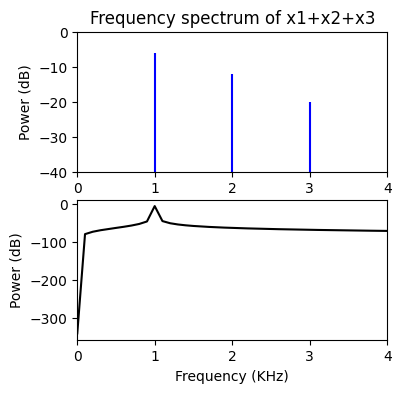

In [74]:
# plot the frequency spectrum
fig, ax = plt.subplots(2,1, figsize=(4,4))
f_scale = 1e3# frequency scale [Hz]
p_scale = 1 # power scale in [dB]
ax[0].stem(
    fD[fD>=0] / f_scale,
    power_yf_dB[fD>=0] / p_scale,
    bottom=np.min(power_yf_dB / p_scale),
    #use_line_collection=True,
    linefmt="b-",
    markerfmt="none",
    basefmt="r-",
)
ax[0].set_xlabel("Frequency (KHz)")
ax[0].set_ylabel("Power (dB)")
ax[0].set_title("Frequency spectrum of x1+x2+x3")
f_lim = 4e3/f_scale # limitting frequency
ax[0].set_xlim([0, f_lim])
ax[0].set_ylim([-40, 0])
ax[1].plot(
    fD[fD>=0] / f_scale,
    power_yf2_dB[fD>=0] / p_scale,
    ls="-",
    color="k",
    marker="none"
)
ax[1].set_xlabel("Frequency (KHz)")
ax[1].set_ylabel("Power (dB)")
ax[1].set_xlim([0, f_lim])

<p align="justify">
As it is possible to observe, the plot of x1 in black (the second curve) gives us a spectral dirac that is not concentrated on a single frequency bin, and rather spreads throughout the frequency with decreasing power throughout the spectrum.
</p>

<h3 align="left"> 2.1- One possible solution: Windows!</h3>

<p align="justify">
The use of a window defining the simulation time window in which the spectrum of the signal will be analysed can significantly improve the spectral quality of the observed signal in the frequency spectrum. The following example uses a Blackman-Harris window, multiplying it to the signal in the time-domain. As such, the obtained signal's frequency spectrum features a much more perceptible definition of the central frequency of each signal's harmonic. The resulting computed spectral power of each harmonic appears to be lower than the spectrum obtained without the use of a window. This is a mere appearance, and it results from the fact that the Blackman-Harris window causes the power of each harmonic to be spread throughout 5 frequency bins (2 bins before, the central bin of the harmonic and 2 bins after).
</p>

<p align="justify">NOTE: Another solution (which is actually preferred) would be to use coherent sampling - ensuring the sampling frequency is simultaneously a prime number and a multiple of the input signal's frequency. Both solutions can also be used simultaneously.</p>

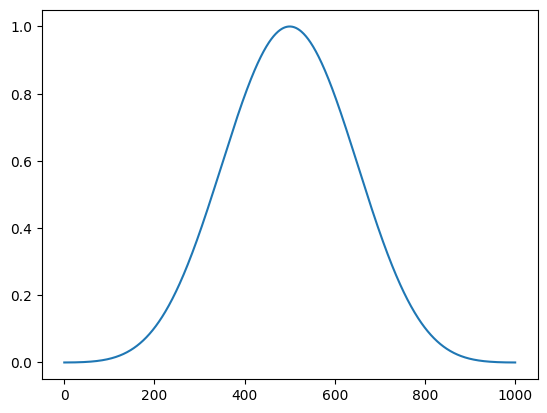

In [75]:
# applying a blackman harris window to
# better observe the signal's spectrum
from scipy import signal
window = signal.windows.blackmanharris(Np)
plt.plot(window)

In [76]:
# spectral analysis using fft - fast fourier transform
ytbm = yt*signal.windows.blackmanharris(Np)
yfbm = np.abs(np.fft.fftshift(np.fft.fft(ytbm) / Np))  # [V] # voltage in the frequency axis
# NOTE: fft(yf) is divided by Np in order to normalize the resulting frequency spectrum from the digital fourier transform
power_yfbm = (yfbm*yfbm) # [V^2] - square the voltage spectrum to obtain the power spectrum
power_yfbm_dB = 10 * np.log10(power_yfbm)  # [dB] - convert the power spectrum to dB
power_yfbm_dB

array([-166.232398  , -166.23231421, -166.23214652, ..., -166.23214652,
       -166.23231421, -166.23239799])

(0.0, 4.0)

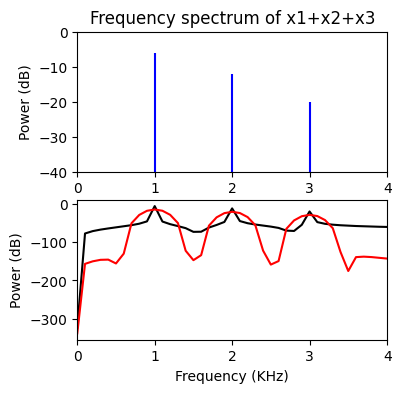

In [77]:
# plot the frequency spectrum
fig, ax = plt.subplots(2,1, figsize=(4,4))
f_scale = 1e3# frequency scale [Hz]
p_scale = 1 # power scale in [dB]
ax[0].stem(
    fD[fD>=0] / f_scale,
    power_yf_dB[fD>=0] / p_scale,
    bottom=np.min(power_yf_dB / p_scale),
    #use_line_collection=True,
    linefmt="b-",
    markerfmt="none",
    basefmt="r-",
)
ax[0].set_xlabel("Frequency (KHz)")
ax[0].set_ylabel("Power (dB)")
ax[0].set_title("Frequency spectrum of x1+x2+x3")
f_lim = 4e3/f_scale # limitting frequency
ax[0].set_xlim([0, f_lim])
ax[0].set_ylim([-40, 0])
ax[1].plot(
    fD[fD>=0] / f_scale,
    power_yf_dB[fD>=0] / p_scale,
    ls="-",
    color="k",
    marker="none",
)
ax[1].plot(
    fD[fD>=0] / f_scale,
    power_yfbm_dB[fD>=0] / p_scale,
    ls="-",
    color="r",
    marker="none",
)
ax[1].set_xlabel("Frequency (KHz)")
ax[1].set_ylabel("Power (dB)")
ax[1].set_xlim([0, f_lim])

<h2 align="center"> 3. White Noise Representation </h2>

<p align="justify">
To perform a more accurate simulation of the signal converters that are going to be studied in this course, a superposition of noise to the processed signal is inevitable and required. The process of quantizing an ideal signal without any supperposed noise will inevitably add a quantization error to the signal, as seen in the following equation.
</p>

$$ s_Q(t) = s(t) + \epsilon_Q(t) \hspace{10pt} (1)$$

where $\epsilon_Q(t)$ is the quantization error, $s_Q(t)$ is the quantized signal and $s(t)$ is the processed signal.

<p align="justify">
However, in reality all analog signals are subject to some form of noise. If the processed signal features a given level of noise power superposed to it, and the signal converter/quantizer features an high-enough quantization precision, the quantization error can actually be well approximated by white noise, as seen in (2). White noise is present throughout all the spectrum of both the signal and the quantizing system. It features a constant power spectral density throughout the system's operation spectrum, and as such it is very easy to model through a uniform distribution.
</p>

$$s_Q(t) = (x(t) + n(t)) + \epsilon_Q(t) = x(t) + v_{NQ}(t) \hspace{10pt} (2)$$

where $x(t)$ is the processed signal, $n(t)$ is the noise superposed to the processed signal and $v_{NQ}(t)$ is the quantization white noise approximated by the sum of $n(t)$ and $\epsilon_Q(t)$.

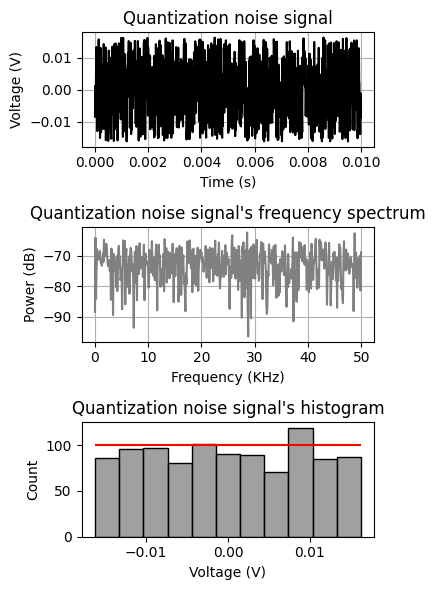

In [111]:
# The white noise can be modelled by a normal distribution
# with zero mean and a standard deviation corresponding to the 
# desired maximum noise voltage level.
from numpy.random import normal, uniform # random numbers fitted into a normal or uniform distribution
import seaborn as sns # to observe the noise signal's histogram
# define the quantizer's main parameters
nbits = 4 # number of bits
vref = 0.9 # reference voltage [V]
vlsb = vref / (2**nbits) # fundamental step votlage of the quantizer [V]
# define the noise parameters
vqmean = 0 # quantizer's mean voltage [V]
vqvar = (vlsb**2)/12 # quantization noise variance  [V]
vqstddev = np.sqrt(vqvar) # quantization noise standard deviation (Vqrms) [V]
# generate the noise signal
#vq = normal(vqmean, vqstddev, Np) # quantization noise signal with a normal dist (gaussian noise) [V]
vq = uniform(-vqstddev, vqstddev, Np) # quantization noise signal with a uniform dist (white noise)[V]
#sns.distplot(vq, bins=10, hist_kws={"edgecolor":"black"})
# frequency domain analysis of the white noise signal
vqf = np.abs(np.fft.fftshift(np.fft.fft(vq) / Np))  # [V] # voltage in the frequency axis
pqf = (vqf*vqf) # [V^2] - square the voltage spectrum to obtain the power spectrum
pqf_dB = 10 * np.log10(pqf)  # [dB] - convert the power spectrum to dB
# plot the frequency spectrum
# plot the noise signal in the time domain, frequency domain 
# and its histogram
fig, ax = plt.subplots(3,1, figsize=(4,6))
ax[0].plot(tD, vq, ls="-", color="k", marker="none")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Voltage (V)")
ax[0].set_title("Quantization noise signal")
ax[1].plot( 
    fD[fD>=0] / f_scale, pqf_dB[fD>=0] / p_scale,
    ls="-", color="gray", marker="none")
ax[1].set_xlabel("Frequency (KHz)")
ax[1].set_ylabel("Power (dB)")
ax[1].set_title("Quantization noise signal's frequency spectrum")
sns.histplot(vq, ax=ax[2], color="gray")
ax[2].hlines(
    y=np.mean(np.histogram(vq, bins=10)[0]), 
    xmin=-vqstddev, xmax=vqstddev, color="r")
ax[2].set_xlabel("Voltage (V)")
ax[2].set_ylabel("Count")
ax[2].set_title("Quantization noise signal's histogram")
ax[0].grid()
ax[1].grid()
ax[2].grid(False)
fig.tight_layout()

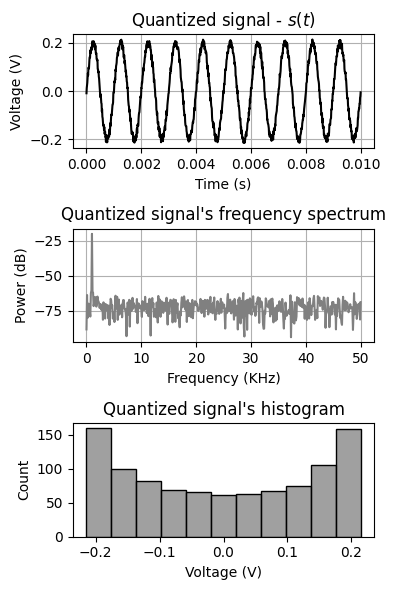

In [112]:
# let us now superpose the noise signal to the x1 signal and observe 
# the resulting signal's frequency spectrum, histogram and time domain
Amp1 = 0.2 # amplitude of the sine wave [V]
x1 = Amp1*np.sin(2*np.pi*f1*tD + phase1_rad) # [V] - sine wave
st = x1 + vq
stf = np.abs(np.fft.fftshift(np.fft.fft(st) / Np))  # [V] # voltage in the frequency axis
ptf = (stf*stf) # [V^2] - square the voltage spectrum to obtain the power spectrum
ptf_dB = 10 * np.log10(ptf)  # [dB] - convert the power spectrum to dB
# plot the frequency spectrum
# plot the noise signal in the time domain, frequency domain
# and its histogram
fig, ax = plt.subplots(3,1, figsize=(4,6))
ax[0].plot(tD, st, ls="-", color="k", marker="none")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Voltage (V)")
ax[0].set_title(r"Quantized signal - $s(t)$")
ax[1].plot(
    fD[fD>=0] / f_scale, ptf_dB[fD>=0] / p_scale,
    ls="-", color="gray", marker="none")
ax[1].set_xlabel("Frequency (KHz)")
ax[1].set_ylabel("Power (dB)")
ax[1].set_title("Quantized signal's frequency spectrum")
sns.histplot(st, ax=ax[2], color="gray")
ax[2].set_xlabel("Voltage (V)")
ax[2].set_ylabel("Count")
ax[2].set_title("Quantized signal's histogram")
ax[0].grid()
ax[1].grid()
ax[2].grid(False)
fig.tight_layout()

<p>